## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [2]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from typing import List

In [4]:
from features import ExtractLetterTransformer

In [5]:
import features as pp

In [6]:
class Preprocesing(BaseEstimator, TransformerMixin):

    def __init__(self, variables : List[str]):
        
        if not isinstance(variables, list):
            raise ValueError("Expected a variables list")
        
        self.variables = variables

    def fit(self, X: pd.DataFrame, y: pd.Series):
        return self
    
    def transform(self, X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
        X = X.copy()

        def get_title(passenger):
            line = passenger
            if re.search('Mrs', line):
                return 'Mrs'
            elif re.search('Mr', line):
                return 'Mr'
            elif re.search('Miss', line):
                return 'Miss'
            elif re.search('Master', line):
                return 'Master'
            else:
                return 'Other'

        X = X.replace("?", np.nan)

        for features in self.variables:
           X[features] =  X[features].apply(get_title)
        return X

In [7]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [8]:
Data = data.copy()
data_y = Data.pop("survived")
data_x = Data

In [9]:
cabin_pp = pp.ExtractLetterTransformer(variables= ["cabin"])
cabin_pp.fit(data_x, data_y)
new_data = cabin_pp.transform(data_x)

In [10]:
new_data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B,S,2,?,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C,S,?,?,"Montreal, PQ / Chesterville, ON"


In [11]:
cleaning = pp.Cleaning(variables=["name"])

In [12]:
cleaning.transform(data_x)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328,NaN,Miss
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Miss
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304,NaN,Mr
1307,3,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,NaN,C,NaN,NaN,NaN,Mr


In [13]:
cat_col_quemark = [col for col in data.columns if data[col].dtype == "O" and "?" in data[col].value_counts()]
cat_col = [col for col in data.columns if data[col].dtype == "O"]

In [14]:
cat_col_quemark

['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']

In [15]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [16]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [17]:
np.random.choice(data.name, size= 10, replace= False)

array(['Krekorian, Mr. Neshan', 'Sage, Master. Thomas Henry',
       'Guest, Mr. Robert', 'Pears, Mr. Thomas Clinton',
       "Dean, Miss. Elizabeth Gladys 'Millvina'",
       'Andersson, Master. Sigvard Harald Elias', 'Montvila, Rev. Juozas',
       'Scanlan, Mr. James', 'Thayer, Mr. John Borland Jr',
       'Asplund, Master. Clarence Gustaf Hugo'], dtype=object)

In [18]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [19]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [20]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [21]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [22]:
target = 'survived'

In [23]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [24]:
vars_cat = [col for col in data.columns if data[col].dtype == "O" and col != target or data[col].nunique() <=25]

vars_num = [col for col in data.columns if col not in vars_cat]

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 2
Number of categorical variables: 8


### Find missing values in variables

In [25]:
# first in numerical variables
data[vars_num].isnull().sum()


age     263
fare      1
dtype: int64

In [26]:
# now in categorical variables
data[vars_cat].isnull().sum()

pclass         0
survived       0
sex            0
sibsp          0
parch          0
cabin       1014
embarked       2
title          0
dtype: int64

### Determine cardinality of categorical variables

In [27]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [28]:
data.cabin.value_counts().sort_values(ascending = False)

F      8
C23    6
G6     5
B57    5
C78    4
      ..
B3     1
A24    1
A32    1
C53    1
F38    1
Name: cabin, Length: 181, dtype: int64

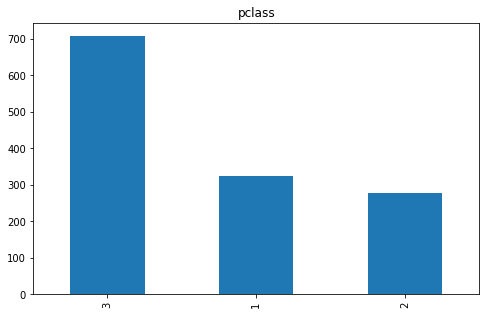

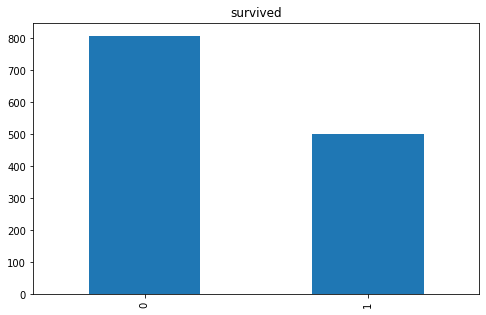

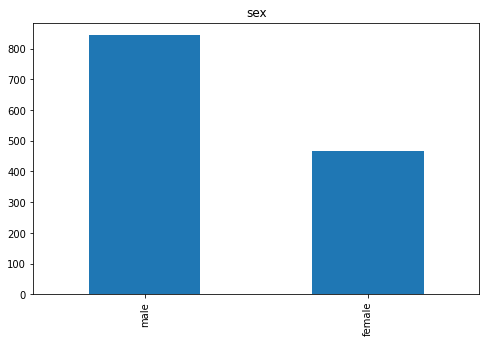

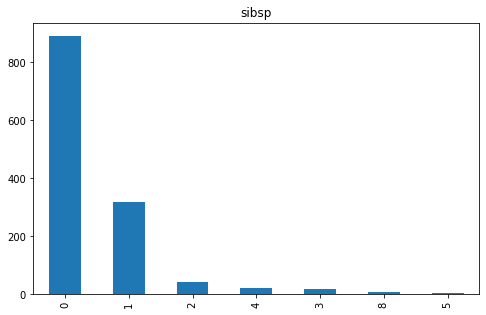

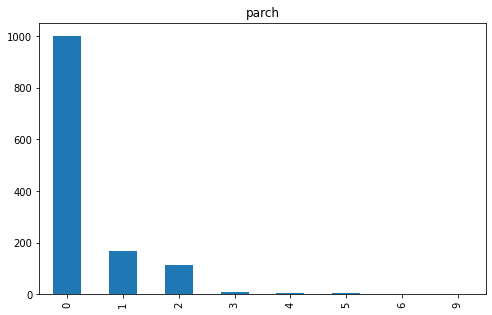

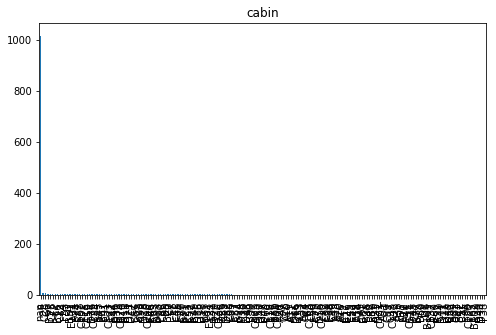

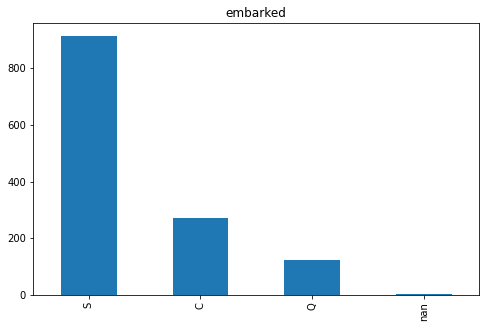

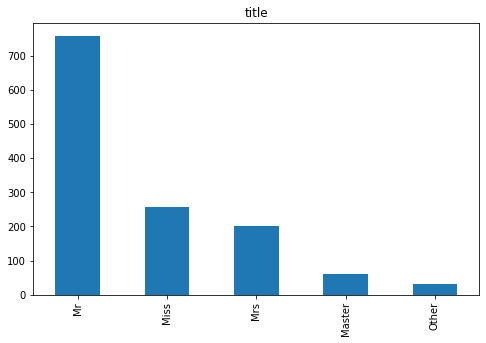

In [29]:
# here we can see that cabin has heighest cardinality
for col in vars_cat:
    data[col].value_counts(dropna = False).plot(kind = "bar", layout = (2,2), figsize = (8,5), title = col)
    plt.show()


### Determine the distribution of numerical variables

In [30]:
data[vars_num].head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


In [31]:
data[vars_num].isnull().sum()

age     263
fare      1
dtype: int64

In [32]:
data[vars_num].describe(percentiles =[0,0.25,0.5,0.75,0.90,0.95,0.98])

,age,fare
count,1046.000000,1308.000000
mean,29.881135,33.295479
std,14.413500,51.758668
min,0.166700,0.000000
0%,0.166700,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,39.000000,31.275000
90%,50.000000,78.050820
95%,57.000000,133.650000


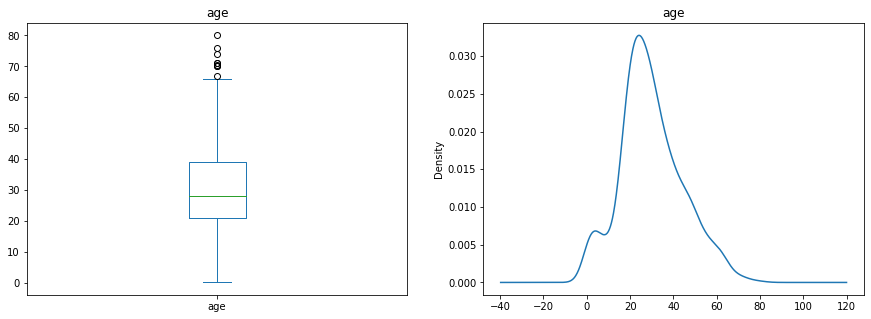

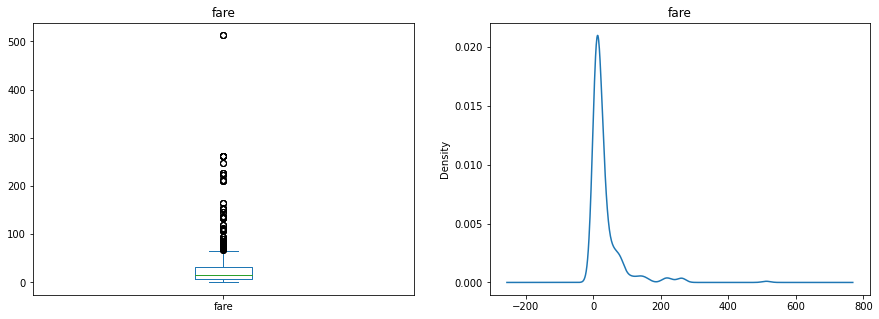

In [33]:
# Even though it is not important for independent variables to be normal distributed for tree based models but when working with linear models or any model that has
# gradient descent in background it is good to convert the variables to be normal distributed for faster converging

for col in vars_num:
    plt.subplot(1,2,1)
    data[col].plot(kind="box",figsize = (15,5), layout = (1,2), title = col)
    plt.subplot(1,2,2)
    data[col].plot(kind="kde",figsize = (15,5), layout = (1,2), title = col)
    plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 1118 to 684
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1047 non-null   int64  
 1   sex       1047 non-null   object 
 2   age       841 non-null    float64
 3   sibsp     1047 non-null   int64  
 4   parch     1047 non-null   int64  
 5   fare      1046 non-null   float64
 6   cabin     244 non-null    object 
 7   embarked  1045 non-null   object 
 8   title     1047 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 81.8+ KB


In [36]:
X_train.cabin = X_train.cabin.apply(lambda x : x if type(x) != str else x[0])
X_test.cabin = X_test.cabin.apply(lambda x : x if type(x) != str else x[0])

In [37]:
X_train.head()


,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1118,3,male,25.0,0,0,7.9250,NaN,S,Mr
44,1,female,41.0,0,0,134.5000,E,C,Miss
1072,3,male,NaN,0,0,7.7333,NaN,Q,Mr
1130,3,female,18.0,0,0,7.7750,NaN,S,Miss
574,2,male,29.0,1,0,21.0000,NaN,S,Mr


In [38]:
X_test.head(8)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1139,3,male,38.0,0,0,7.8958,NaN,S,Mr
533,2,female,21.0,0,1,21.0000,NaN,S,Miss
459,2,male,42.0,1,0,27.0000,NaN,S,Mr
1150,3,male,NaN,0,0,14.5000,NaN,S,Mr
393,2,male,25.0,0,0,31.5000,NaN,S,Mr
1189,3,female,4.0,1,1,16.7000,G,S,Miss
5,1,male,48.0,0,0,26.5500,E,S,Mr
231,1,male,52.0,0,0,30.5000,C,S,Other


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [39]:
X_train[vars_num].head()

,age,fare
1118,25.0,7.9250
44,41.0,134.5000
1072,NaN,7.7333
1130,18.0,7.7750
574,29.0,21.0000


In [40]:
X_train[vars_num].isnull().sum()

age     206
fare      1
dtype: int64

In [41]:
# Creating the binary variable for age
X_train["age_binary"] = X_train.age.apply(lambda x : 1 if str(x) == "nan" else 0)

In [42]:
# another way for creating binary variables 
X_test["age_binary"] = np.where(X_test.age.isnull(),1,0)

In [43]:
# imputing the missing values in age column
X_train.age = X_train.age.apply(lambda x : X_train.age.median() if str(x) == "nan" else x)
X_test.age = X_test.age.apply(lambda x : X_train.age.median() if str(x) == "nan" else x)

In [44]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_binary
1118,3,male,25.0,0,0,7.9250,NaN,S,Mr,0
44,1,female,41.0,0,0,134.5000,E,C,Miss,0
1072,3,male,28.0,0,0,7.7333,NaN,Q,Mr,1
1130,3,female,18.0,0,0,7.7750,NaN,S,Miss,0
574,2,male,29.0,1,0,21.0000,NaN,S,Mr,0


In [45]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_binary
1139,3,male,38.0,0,0,7.8958,NaN,S,Mr,0
533,2,female,21.0,0,1,21.0000,NaN,S,Miss,0
459,2,male,42.0,1,0,27.0000,NaN,S,Mr,0
1150,3,male,28.0,0,0,14.5000,NaN,S,Mr,1
393,2,male,25.0,0,0,31.5000,NaN,S,Mr,0


In [46]:
X_train.fare =  X_train.fare.where(X_train.fare.notnull(),X_train.fare.median())

### Replace Missing data in categorical variables with the string **Missing**

In [47]:
vars_cat.pop(1)

'survived'

In [48]:
vars_cat

['pclass', 'sex', 'sibsp', 'parch', 'cabin', 'embarked', 'title']

In [49]:
X_train[vars_cat].head()

,pclass,sex,sibsp,parch,cabin,embarked,title
1118,3,male,0,0,NaN,S,Mr
44,1,female,0,0,E,C,Miss
1072,3,male,0,0,NaN,Q,Mr
1130,3,female,0,0,NaN,S,Miss
574,2,male,1,0,NaN,S,Mr


In [50]:
X_train.isnull().mean()

pclass        0.000000
sex           0.000000
age           0.000000
sibsp         0.000000
parch         0.000000
fare          0.000000
cabin         0.766953
embarked      0.001910
title         0.000000
age_binary    0.000000
dtype: float64

In [51]:
for col in vars_cat:
    X_train[col] = X_train[col].where(X_train[col].notnull(), "Missing")
    X_test[col] = X_test[col].where(X_test[col].notnull(), "Missing")

In [52]:
X_train.isnull().mean()

pclass        0.0
sex           0.0
age           0.0
sibsp         0.0
parch         0.0
fare          0.0
cabin         0.0
embarked      0.0
title         0.0
age_binary    0.0
dtype: float64

In [53]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_binary
1118,3,male,25.0,0,0,7.9250,Missing,S,Mr,0
44,1,female,41.0,0,0,134.5000,E,C,Miss,0
1072,3,male,28.0,0,0,7.7333,Missing,Q,Mr,1
1130,3,female,18.0,0,0,7.7750,Missing,S,Miss,0
574,2,male,29.0,1,0,21.0000,Missing,S,Mr,0


In [54]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_binary
1139,3,male,38.0,0,0,7.8958,Missing,S,Mr,0
533,2,female,21.0,0,1,21.0000,Missing,S,Miss,0
459,2,male,42.0,1,0,27.0000,Missing,S,Mr,0
1150,3,male,28.0,0,0,14.5000,Missing,S,Mr,1
393,2,male,25.0,0,0,31.5000,Missing,S,Mr,0


In [55]:
X_test.cabin.unique()

array(['Missing', 'G', 'E', 'C', 'B', 'A', 'F', 'D'], dtype=object)

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 1118 to 684
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1047 non-null   int64  
 1   sex         1047 non-null   object 
 2   age         1047 non-null   float64
 3   sibsp       1047 non-null   int64  
 4   parch       1047 non-null   int64  
 5   fare        1047 non-null   float64
 6   cabin       1047 non-null   object 
 7   embarked    1047 non-null   object 
 8   title       1047 non-null   object 
 9   age_binary  1047 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 90.0+ KB


In [57]:
# categorical variables with lables less than 0.05
rare_lables = [col for col in vars_cat if [x for x in X_train[col].value_counts(normalize= True) if x <= 0.05] != []]
rare_lables

['sibsp', 'parch', 'cabin', 'embarked', 'title']

In [58]:
[round(x,2) for x in X_train.sibsp.value_counts(normalize= True)]

[0.67, 0.25, 0.03, 0.02, 0.02, 0.01, 0.01]

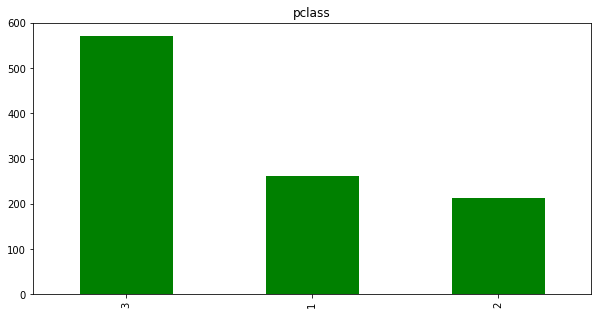

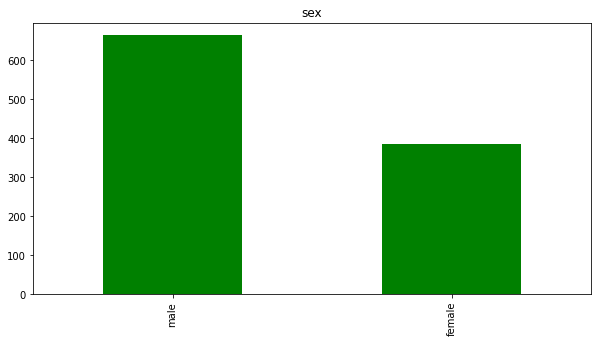

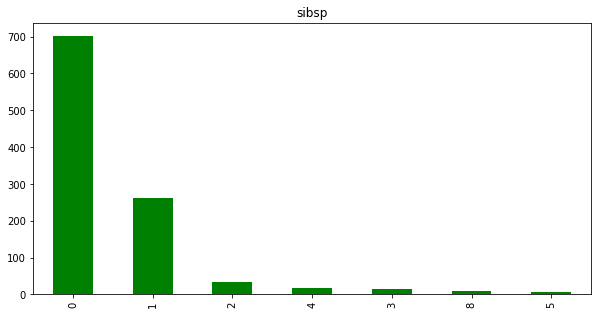

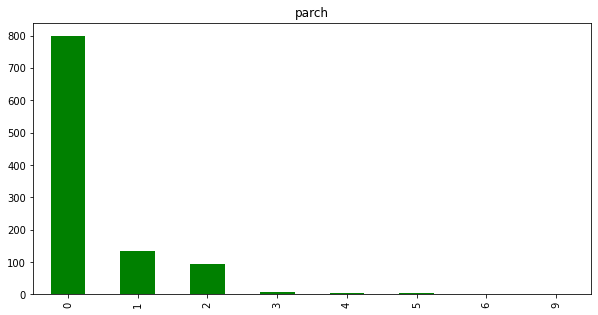

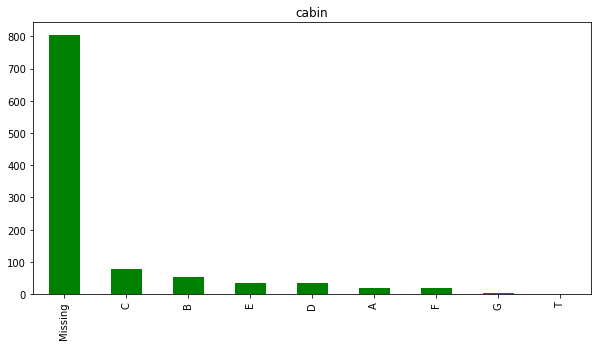

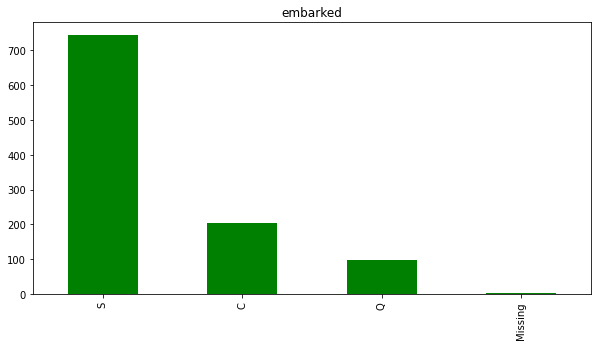

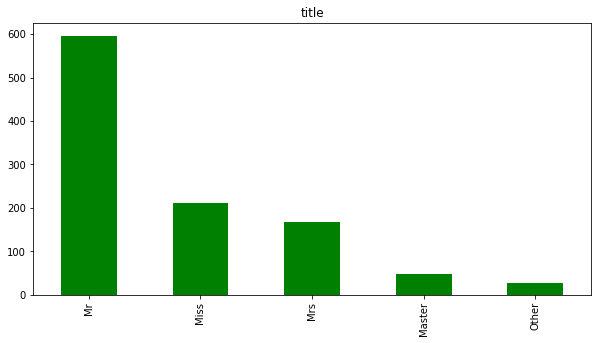

In [59]:
for col in vars_cat:
    X_train[col].value_counts().plot(kind = "bar", color = "green", figsize = (10,5), title = col)
    plt.show()

### Assigning Rare tag to all the lables that has less than 5 percent passengers

In [60]:
rare_lables

['sibsp', 'parch', 'cabin', 'embarked', 'title']

In [61]:
X_test

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_binary
1139,3,male,38.0,0,0,7.8958,Missing,S,Mr,0
533,2,female,21.0,0,1,21.0000,Missing,S,Miss,0
459,2,male,42.0,1,0,27.0000,Missing,S,Mr,0
1150,3,male,28.0,0,0,14.5000,Missing,S,Mr,1
393,2,male,25.0,0,0,31.5000,Missing,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
753,3,male,22.0,0,0,8.0500,Missing,S,Mr,0
1052,3,male,28.0,0,0,7.8958,Missing,S,Mr,1
426,2,male,30.0,0,0,13.0000,Missing,S,Mr,0
554,2,male,26.0,0,0,13.0000,Missing,S,Mr,0


In [62]:
for col in ['cabin', 'embarked', 'title']:
    rare_labeled  = dict(X_train[col].value_counts(normalize= True).where(round(X_train[col].value_counts(normalize= True),2) >= 0.05, "Rare"))
    X_train[col] = X_train[col].apply(lambda x : "Rare" if dict(rare_labeled)[x] == "Rare" else x)
    X_test[col] = X_test[col].apply(lambda x : "Rare" if dict(rare_labeled)[x] == "Rare" else x)
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_binary
1118,3,male,25.0000,0,0,7.9250,Missing,S,Mr,0
44,1,female,41.0000,0,0,134.5000,Rare,C,Miss,0
1072,3,male,28.0000,0,0,7.7333,Missing,Q,Mr,1
1130,3,female,18.0000,0,0,7.7750,Missing,S,Miss,0
574,2,male,29.0000,1,0,21.0000,Missing,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,Missing,S,Miss,0
835,3,male,28.0000,0,0,8.0500,Missing,S,Mr,1
1216,3,female,28.0000,0,0,7.7333,Missing,Q,Miss,1
559,2,female,20.0000,0,0,36.7500,Missing,S,Miss,0


In [63]:
for col in rare_lables:
    print(f"{col}")
    print(X_train[col].value_counts(normalize= True))
    print()

sibsp
0    0.671442
1    0.249284
2    0.033429
4    0.016237
3    0.015282
8    0.008596
5    0.005731
Name: sibsp, dtype: float64

parch
0    0.764088
1    0.128940
2    0.088825
3    0.006686
4    0.004776
5    0.003820
6    0.001910
9    0.000955
Name: parch, dtype: float64

cabin
Missing    0.766953
Rare       0.108883
C          0.074499
B          0.049666
Name: cabin, dtype: float64

embarked
S       0.709647
C       0.195798
Q       0.092646
Rare    0.001910
Name: embarked, dtype: float64

title
Mr      0.569245
Miss    0.200573
Mrs     0.159503
Rare    0.070678
Name: title, dtype: float64



### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [64]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_binary
1118,3,male,25.0,0,0,7.9250,Missing,S,Mr,0
44,1,female,41.0,0,0,134.5000,Rare,C,Miss,0
1072,3,male,28.0,0,0,7.7333,Missing,Q,Mr,1
1130,3,female,18.0,0,0,7.7750,Missing,S,Miss,0
574,2,male,29.0,1,0,21.0000,Missing,S,Mr,0


In [65]:
X_train = pd.get_dummies(X_train,columns=["sex", "cabin", "embarked", "title"], drop_first= True)
X_train

,pclass,age,sibsp,parch,fare,age_binary,sex_male,cabin_C,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,3,25.0000,0,0,7.9250,0,1,0,1,0,0,0,1,1,0,0
44,1,41.0000,0,0,134.5000,0,0,0,0,1,0,0,0,0,0,0
1072,3,28.0000,0,0,7.7333,1,1,0,1,0,1,0,0,1,0,0
1130,3,18.0000,0,0,7.7750,0,0,0,1,0,0,0,1,0,0,0
574,2,29.0000,1,0,21.0000,0,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,0.1667,1,2,20.5750,0,0,0,1,0,0,0,1,0,0,0
835,3,28.0000,0,0,8.0500,1,1,0,1,0,0,0,1,1,0,0
1216,3,28.0000,0,0,7.7333,1,0,0,1,0,1,0,0,0,0,0
559,2,20.0000,0,0,36.7500,0,0,0,1,0,0,0,1,0,0,0


In [66]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_binary
1139,3,male,38.0,0,0,7.8958,Missing,S,Mr,0
533,2,female,21.0,0,1,21.0000,Missing,S,Miss,0
459,2,male,42.0,1,0,27.0000,Missing,S,Mr,0
1150,3,male,28.0,0,0,14.5000,Missing,S,Mr,1
393,2,male,25.0,0,0,31.5000,Missing,S,Mr,0


In [67]:
X_test = pd.get_dummies(X_test, columns=["sex", "cabin", "embarked", "title"], drop_first= True)
X_test

,pclass,age,sibsp,parch,fare,age_binary,sex_male,cabin_C,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare
1139,3,38.0,0,0,7.8958,0,1,0,1,0,0,1,1,0,0
533,2,21.0,0,1,21.0000,0,0,0,1,0,0,1,0,0,0
459,2,42.0,1,0,27.0000,0,1,0,1,0,0,1,1,0,0
1150,3,28.0,0,0,14.5000,1,1,0,1,0,0,1,1,0,0
393,2,25.0,0,0,31.5000,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,3,22.0,0,0,8.0500,0,1,0,1,0,0,1,1,0,0
1052,3,28.0,0,0,7.8958,1,1,0,1,0,0,1,1,0,0
426,2,30.0,0,0,13.0000,0,1,0,1,0,0,1,1,0,0
554,2,26.0,0,0,13.0000,0,1,0,1,0,0,1,1,0,0


In [68]:
missing_features_test = list(set(X_train).difference(set(X_test)))

In [69]:
X_test[missing_features_test] = 0
X_test.head()

,pclass,age,sibsp,parch,fare,age_binary,sex_male,cabin_C,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare,embarked_Rare
1139,3,38.0,0,0,7.8958,0,1,0,1,0,0,1,1,0,0,0
533,2,21.0,0,1,21.0000,0,0,0,1,0,0,1,0,0,0,0
459,2,42.0,1,0,27.0000,0,1,0,1,0,0,1,1,0,0,0
1150,3,28.0,0,0,14.5000,1,1,0,1,0,0,1,1,0,0,0
393,2,25.0,0,0,31.5000,0,1,0,1,0,0,1,1,0,0,0


### Scale the variables

- Use the standard scaler from Scikit-learn

In [70]:
scaler = StandardScaler()

In [71]:
X_train

,pclass,age,sibsp,parch,fare,age_binary,sex_male,cabin_C,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,3,25.0000,0,0,7.9250,0,1,0,1,0,0,0,1,1,0,0
44,1,41.0000,0,0,134.5000,0,0,0,0,1,0,0,0,0,0,0
1072,3,28.0000,0,0,7.7333,1,1,0,1,0,1,0,0,1,0,0
1130,3,18.0000,0,0,7.7750,0,0,0,1,0,0,0,1,0,0,0
574,2,29.0000,1,0,21.0000,0,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,0.1667,1,2,20.5750,0,0,0,1,0,0,0,1,0,0,0
835,3,28.0000,0,0,8.0500,1,1,0,1,0,0,0,1,1,0,0
1216,3,28.0000,0,0,7.7333,1,0,0,1,0,1,0,0,0,0,0
559,2,20.0000,0,0,36.7500,0,0,0,1,0,0,0,1,0,0,0


In [72]:
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [73]:
X_train

,pclass,age,sibsp,parch,fare,age_binary,sex_male,cabin_C,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,0.835808,-0.370162,-0.478911,-0.455423,-0.504782,-0.494921,0.761042,-0.283717,0.551235,-0.349552,-0.319539,-0.043748,0.639650,0.869892,-0.435629,-0.275778
44,-1.542157,0.904029,-0.478911,-0.455423,1.971555,-0.494921,-1.313987,-0.283717,-1.814107,2.860806,-0.319539,-0.043748,-1.563355,-1.149569,-0.435629,-0.275778
1072,0.835808,-0.131251,-0.478911,-0.455423,-0.508533,2.020526,0.761042,-0.283717,0.551235,-0.349552,3.129507,-0.043748,-1.563355,0.869892,-0.435629,-0.275778
1130,0.835808,-0.927621,-0.478911,-0.455423,-0.507717,-0.494921,-1.313987,-0.283717,0.551235,-0.349552,-0.319539,-0.043748,0.639650,-1.149569,-0.435629,-0.275778
574,-0.353174,-0.051614,0.434422,-0.455423,-0.248980,-0.494921,0.761042,-0.283717,0.551235,-0.349552,-0.319539,-0.043748,0.639650,0.869892,-0.435629,-0.275778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.835808,-2.347810,0.434422,1.910970,-0.257295,-0.494921,-1.313987,-0.283717,0.551235,-0.349552,-0.319539,-0.043748,0.639650,-1.149569,-0.435629,-0.275778
835,0.835808,-0.131251,-0.478911,-0.455423,-0.502337,2.020526,0.761042,-0.283717,0.551235,-0.349552,-0.319539,-0.043748,0.639650,0.869892,-0.435629,-0.275778
1216,0.835808,-0.131251,-0.478911,-0.455423,-0.508533,2.020526,-1.313987,-0.283717,0.551235,-0.349552,3.129507,-0.043748,-1.563355,-1.149569,-0.435629,-0.275778
559,-0.353174,-0.768347,-0.478911,-0.455423,0.059156,-0.494921,-1.313987,-0.283717,0.551235,-0.349552,-0.319539,-0.043748,0.639650,-1.149569,-0.435629,-0.275778


In [74]:
X_train.describe()

,pclass,age,sibsp,parch,fare,age_binary,sex_male,cabin_C,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
count,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03
mean,8.822403e-17,9.797957e-17,2.714585e-17,-1.357293e-17,9.840372e-17,6.150233e-17,1.331843e-16,3.902217e-17,1.017970e-17,-6.786464e-17,-9.331387e-18,1.696616e-17,9.670711e-17,-9.840372e-17,5.768494e-17,-6.786464e-17
std,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00
min,-1.542157e+00,-2.347810e+00,-4.789110e-01,-4.554233e-01,-6.598283e-01,-4.949207e-01,-1.313987e+00,-2.837170e-01,-1.814107e+00,-3.495518e-01,-3.195391e-01,-4.374786e-02,-1.563355e+00,-1.149569e+00,-4.356291e-01,-2.757779e-01
25%,-3.531743e-01,-5.294359e-01,-4.789110e-01,-4.554233e-01,-5.053534e-01,-4.949207e-01,-1.313987e+00,-2.837170e-01,5.512355e-01,-3.495518e-01,-3.195391e-01,-4.374786e-02,-1.563355e+00,-1.149569e+00,-4.356291e-01,-2.757779e-01
50%,8.358080e-01,-1.312513e-01,-4.789110e-01,-4.554233e-01,-3.770436e-01,-4.949207e-01,7.610424e-01,-2.837170e-01,5.512355e-01,-3.495518e-01,-3.195391e-01,-4.374786e-02,6.396500e-01,8.698916e-01,-4.356291e-01,-2.757779e-01
75%,8.358080e-01,4.262071e-01,4.344220e-01,-4.554233e-01,-4.575737e-02,-4.949207e-01,7.610424e-01,-2.837170e-01,5.512355e-01,-3.495518e-01,-3.195391e-01,-4.374786e-02,6.396500e-01,8.698916e-01,-4.356291e-01,-2.757779e-01
max,8.358080e-01,3.532047e+00,6.827753e+00,1.019335e+01,9.363477e+00,2.020526e+00,7.610424e-01,3.524639e+00,5.512355e-01,2.860806e+00,3.129507e+00,2.285826e+01,6.396500e-01,8.698916e-01,2.295531e+00,3.626107e+00


In [75]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

C:\Users\rahul\anaconda3\envs\mlops\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [76]:
X_test.head()

,pclass,age,sibsp,parch,fare,age_binary,sex_male,cabin_C,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare,embarked_Rare
1139,0.835808,0.665118,-0.478911,-0.455423,-0.505353,-0.494921,0.761042,-0.283717,0.551235,-0.349552,-0.319539,22.858259,0.639650,-1.149569,-0.435629,-0.275778
533,-0.353174,-0.688710,-0.478911,0.727773,-0.248980,-0.494921,-1.313987,-0.283717,0.551235,-0.349552,-0.319539,22.858259,-1.563355,-1.149569,-0.435629,-0.275778
459,-0.353174,0.983666,0.434422,-0.455423,-0.131595,-0.494921,0.761042,-0.283717,0.551235,-0.349552,-0.319539,22.858259,0.639650,-1.149569,-0.435629,-0.275778
1150,0.835808,-0.131251,-0.478911,-0.455423,-0.376148,2.020526,0.761042,-0.283717,0.551235,-0.349552,-0.319539,22.858259,0.639650,-1.149569,-0.435629,-0.275778
393,-0.353174,-0.370162,-0.478911,-0.455423,-0.043556,-0.494921,0.761042,-0.283717,0.551235,-0.349552,-0.319539,22.858259,0.639650,-1.149569,-0.435629,-0.275778


In [77]:
X_test.describe()

,pclass,age,sibsp,parch,fare,age_binary,sex_male,cabin_C,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare,embarked_Rare
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,-0.012817,-0.057668,-0.116367,0.000694,-0.043521,0.052333,0.111606,-0.051146,0.090806,-0.079980,0.022733,14.903745,-0.201192,-0.887501,-0.247992,-0.275778
std,0.980599,1.131001,0.716705,1.115684,1.059397,1.039821,0.964043,0.913680,0.938317,0.892071,1.033168,10.924999,1.072265,0.679941,0.692161,0.000000
min,-1.542157,-2.327900,-0.478911,-0.455423,-0.659828,-0.494921,-1.313987,-0.283717,-1.814107,-0.349552,-0.319539,-0.043748,-1.563355,-1.149569,-0.435629,-0.275778
25%,-0.353174,-0.688710,-0.478911,-0.455423,-0.502337,-0.494921,-1.313987,-0.283717,0.551235,-0.349552,-0.319539,-0.043748,-1.563355,-1.149569,-0.435629,-0.275778
50%,0.835808,-0.131251,-0.478911,-0.455423,-0.366040,-0.494921,0.761042,-0.283717,0.551235,-0.349552,-0.319539,22.858259,0.639650,-1.149569,-0.435629,-0.275778
75%,0.835808,0.426207,0.434422,-0.455423,-0.090021,-0.494921,0.761042,-0.283717,0.551235,-0.349552,-0.319539,22.858259,0.639650,-1.149569,-0.435629,-0.275778
max,0.835808,4.009869,3.174421,10.193346,9.363477,2.020526,0.761042,3.524639,0.551235,2.860806,3.129507,22.858259,0.639650,0.869892,2.295531,-0.275778


## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

<AxesSubplot:ylabel='Frequency'>

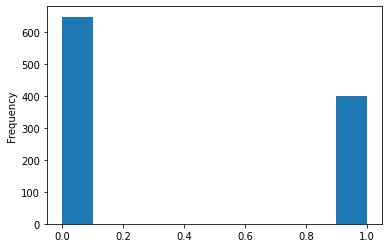

In [78]:
# balanced data
y_train.plot(kind= "hist")

In [79]:
logitmodel = LogisticRegression(C = 0.0005, random_state= 0)

In [80]:
logitmodel.fit(X_train,y_train)

LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [81]:
# for training
y_train_pred = logitmodel.predict(X_train)
y_train_prob = logitmodel.predict_proba(X_train)

# Accuracy
acc = accuracy_score(y_true=y_train,y_pred=y_train_pred)
print(f"Accuracy on the trained data is {acc}")

# ROC-AUC
roc = roc_auc_score(y_train,y_train_prob[:,1])
print(f"ROC_AUC on the trained data is {roc}")

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_train,y_pred=y_train_pred)

Accuracy on the trained data is 0.7058261700095511
ROC_AUC on the trained data is 0.8412017001545595


array([[640,   7],
       [301,  99]], dtype=int64)

In [82]:
# for training
y_test_pred = logitmodel.predict(X_test)
y_test_prob = logitmodel.predict_proba(X_test)

# Accuracy
acc = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print(f"Accuracy on the test data is {acc}")

# ROC-AUC
roc = roc_auc_score(y_test,y_test_prob[:,1])
print(f"ROC_AUC on the test data is {roc}")

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

Accuracy on the test data is 0.6946564885496184
ROC_AUC on the test data is 0.7305246913580248


C:\Users\rahul\anaconda3\envs\mlops\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\rahul\anaconda3\envs\mlops\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([[161,   1],
       [ 79,  21]], dtype=int64)

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**